<a href="https://colab.research.google.com/github/Mohamed-Maher5/Supervised-Machine-Learning/blob/main/Classification%20KNN/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
## Most Important
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Model Selection
from sklearn.model_selection import train_test_split

## Metrics
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

## Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

## Algorithms
from sklearn.neighbors import KNeighborsClassifier

## Metric
from sklearn.metrics import accuracy_score

**Study the dataset**

In [ ]:
file_path = '/content/flag.csv'
flag_dataset = pd.read_csv(file_path)

In [ ]:
flag_dataset.head()

,x1,x2,t
0,5.056366,0.939336,0.0
1,2.981938,-79.924557,0.0
2,4.665495,-96.107950,0.0
3,2.218880,26.874929,0.0
4,4.275082,-81.303200,0.0


In [ ]:
## check the info (nulls and datatypes)
flag_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6315 entries, 0 to 6314
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      6315 non-null   float64
 1   x2      6315 non-null   float64
 2   t       6315 non-null   float64
dtypes: float64(3)
memory usage: 148.1 KB


In [ ]:
## some statistics of the dataset
flag_dataset.describe()

,x1,x2,t
count,6315.000000,6315.000000,6315.000000
mean,3.475106,4.720490,1.072684
std,2.032055,83.677716,0.837212
min,0.000311,-149.944606,0.000000
25%,1.720844,-67.918507,0.000000
50%,3.483822,7.969406,1.000000
75%,5.239977,76.112965,2.000000
max,6.998491,155.255988,2.000000


In [ ]:
## check the nulls
flag_dataset.isna().sum()

x1    0
x2    0
t     0
dtype: int64

WE CAN SEE THERE IS NO NULL VALUES

**Exploratory Data Analysis (EDA)**

In [ ]:
t_values = flag_dataset['t'].value_counts()
t_values

2.0    2459
0.0    2000
1.0    1856
Name: t, dtype: int64

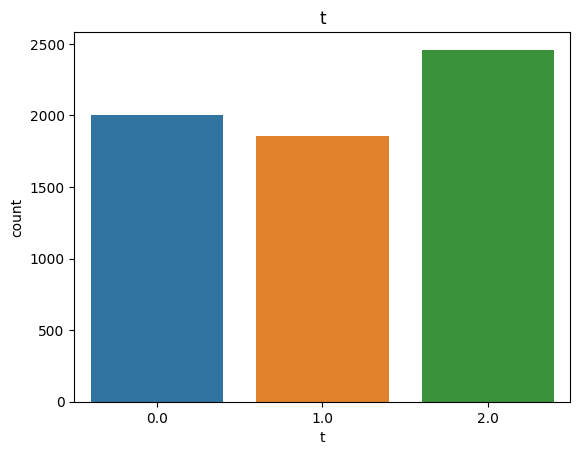

In [ ]:
sns.countplot(data=flag_dataset, x='t')
plt.title('t')
plt.show()

It shows the number of data points that fall within each bin --



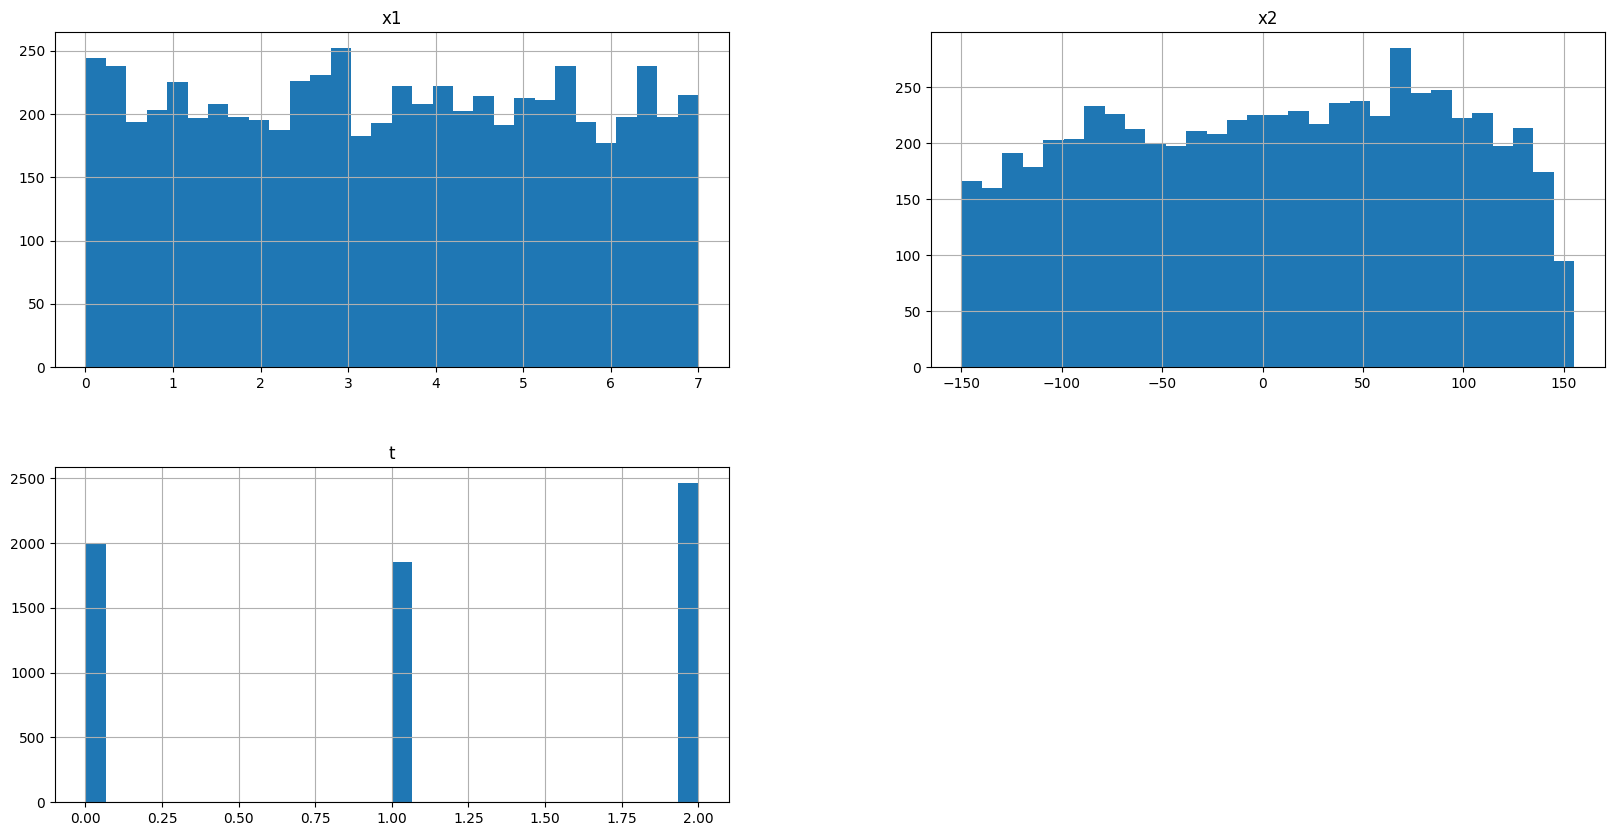

In [ ]:
## Histogram Distribution of Numerical Variables in Dataset
print('It shows the number of data points that fall within each bin --\n')
flag_dataset.hist(bins=30, figsize=(20,10))
plt.show()

<Axes: xlabel='x1', ylabel='x2'>

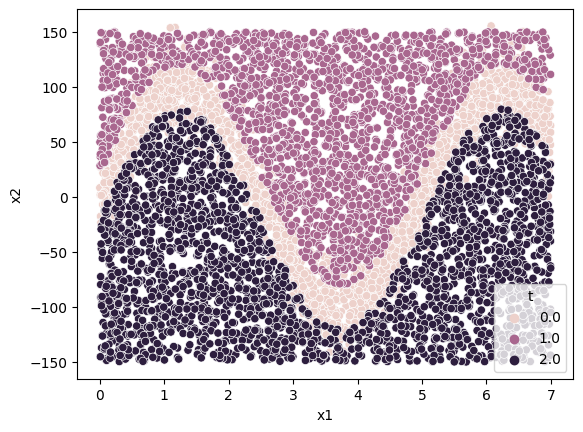

In [ ]:
# Create the scatter plot
sns.scatterplot(x=flag_dataset['x1'], y=flag_dataset['x2'], hue=flag_dataset['t'])

In [ ]:
## Correlations
flag_dataset.corr()['t'].sort_values(ascending=False)

t     1.000000
x1   -0.005471
x2   -0.411450
Name: t, dtype: float64

In [ ]:
## heatmap to explain the corelations more
plt.figure(figsize=(12, 6))
sns.heatmap(flag_dataset.corr(), annot=True, cmap='Greens')
plt.show()

**Split the Dataset**

In [ ]:
## Split the dataset into features and target
X = flag_dataset.drop(columns=['t'], axis=1)  ## features
y = flag_dataset['t']  ## target

In [ ]:
## Split Data into Train_Full and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

## Data shapes
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

**PreProcessing Data**

In [ ]:
## Let's impute (although there is no nulls) and standardize the Dataset ---> All in Pipeline
Scaler = StandardScaler()

## deal with (num_pipline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

**Model Selection**

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

In [ ]:
## Prediction
y_pred_svc_poly = knn_clf.predict(X_test)
print('Accuracy Score using Polynmial Kernel --- ', accuracy_score(y_test, y_pred_svc_poly))